# Groups drought monitor pixels by type of change
This notebook takes a netcdf file of MT drought monitor data and groups pixels by how they changed. The notebooks saves each group as a separate csv file with lat, lon, and date of change. 

In [61]:
import xarray as xr
import pandas as pd
import numpy as np

In [2]:
dir = '/media/nick/Seagate Backup Plus Drive/Data/Drought_Monitor/Montana_Clipped/'
fname = 'All_Droughts_MT.nc'

In [114]:
ds = xr.open_dataset(dir + fname)
ds

<xarray.Dataset>
Dimensions:      (time: 914, x: 230, y: 133)
Coordinates:
  * x            (x) float64 1.14e+05 1.18e+05 1.22e+05 ... 1.026e+06 1.03e+06
  * y            (y) float64 1.8e+04 2.2e+04 2.6e+04 ... 5.42e+05 5.46e+05
  * time         (time) datetime64[ns] 2001-01-02 2001-01-09 ... 2021-06-01
Data variables:
    DM           (time, y, x) float64 ...
    spatial_ref  int64 ...

## Calculate difference between timesteps
The difference is x2 - x1 where the time associated with the difference is t2. Change label to 'lower' to associate time with t1.  


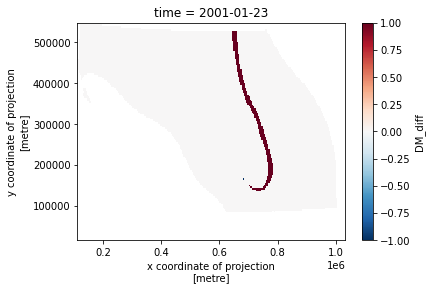

In [4]:
ds = ds.assign(DM_diff = ds.diff(dim='time', n=1, label='upper').DM)
ds.DM_diff[3].plot()

# (ds.DM[3] - ds.DM[2]).plot()  # Run this to compare with above line

## Group arrays by DM

In [48]:
ds_grouped = ds.groupby('DM')
dm0 = ds_grouped[0.0].DM_diff
dm1 = ds_grouped[1.0].DM_diff
dm2 = ds_grouped[2.0].DM_diff
dm3 = ds_grouped[3.0].DM_diff
dm4 = ds_grouped[4.0].DM_diff

## Select pixels where difference is +1 or -1 in grouped arrays

In [102]:
dm0_minus = dm0.where(dm0==-1)
dm1_minus = dm1.where(dm1==-1)
dm1_plus = dm1.where(dm1==1)
dm2_minus = dm2.where(dm2==-1)
dm2_plus = dm2.where(dm2==1)
dm3_minus = dm3.where(dm3==-1)
dm3_plus= dm3.where(dm3==1)
dm4_plus = dm4.where(dm4==1)

## Convert to pandas dataframe and drop nans

In [103]:
dm0_minus_df = dm0_minus.to_pandas().dropna()
dm1_minus_df = dm1_minus.to_pandas().dropna()
dm1_plus_df = dm1_plus.to_pandas().dropna()
dm2_minus_df = dm2_minus.to_pandas().dropna()
dm2_plus_df = dm2_plus.to_pandas().dropna()
dm3_minus_df = dm3_minus.to_pandas().dropna()
dm3_plus_df = dm3_plus.to_pandas().dropna()
dm4_plus_df = dm4_plus.to_pandas().dropna()

## Write as csvs

In [104]:
dm0_minus_df.to_csv('../data/dm0_minus.csv')
dm1_minus_df.to_csv('../data/dm1_minus.csv')
dm1_plus_df.to_csv('../data/dm1_plus.csv')
dm2_minus_df.to_csv('../data/dm2_minus.csv')
dm2_plus_df.to_csv('../data/dm2_plus.csv')
dm3_minus_df.to_csv('../data/dm3_minus.csv')
dm3_plus_df.to_csv('../data/dm3_plus.csv')
dm4_plus_df.to_csv('../data/dm4_plus.csv')

In [113]:
from rasterio.crs import CRS
CRS.from_string(ds.spatial_ref.crs_wkt)

CRS.from_epsg(32100)